## Information gain - mutual information

Mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on Y.

As extracted from [wikipedia](https://en.wikipedia.org/wiki/Mutual_information):

Mutual information measures the information that X and Y share: It measures how much knowing one of these variables reduces uncertainty about the other. For example, if X and Y are independent, then knowing X does not give any information about Y and vice versa, so their mutual information is zero. At the other extreme, if X is a deterministic function of Y and Y is a deterministic function of X then all information conveyed by X is shared with Y: knowing X determines the value of Y and vice versa. As a result, in this case the mutual information is the same as the uncertainty contained in Y (or X) alone, namely the entropy of Y (or X). Moreover, this mutual information is the same as the entropy of X and as the entropy of Y. (A very special case of this is when X and Y are the same random variable.)

I will demonstrate how to select features based on mutual information using sklearn on a regression and classification problem. For classification I will use the Paribas claims dataset from Kaggle. For regression, the House Price dataset from Kaggle.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [2]:
# load dataset
data = pd.read_csv('paribas.csv', nrows=50000)
data.shape

(50000, 133)

In [3]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [4]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(50000, 114)

### Important

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [5]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 112), (15000, 112))

In [6]:
# calculate the mutual information between the variables and the target
# this returns the mutual information value of each feature
# the smaller the value the less information the feature has about the
# target
mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([1.02640966e-03, 5.97222546e-03, 2.13444191e-03, 4.91593172e-03,
       5.71151699e-03, 7.84482404e-03, 4.94572990e-03, 2.76723405e-03,
       2.46245443e-02, 3.97915527e-03, 1.72575406e-02, 7.08523772e-03,
       2.20813665e-02, 6.02707137e-03, 8.20204239e-03, 9.67416761e-06,
       1.00342328e-03, 3.29233621e-03, 2.19941064e-03, 1.15400528e-02,
       0.00000000e+00, 4.75820015e-03, 1.96917659e-03, 3.60134504e-03,
       3.89745495e-03, 5.16539687e-03, 5.43308289e-03, 7.54027404e-03,
       8.46611408e-03, 7.28432586e-03, 3.98575674e-03, 3.57088896e-03,
       6.26979754e-03, 6.07362186e-03, 7.16196237e-03, 4.51029700e-03,
       5.34492213e-03, 4.88527469e-03, 4.78077827e-03, 6.02893360e-03,
       3.97556157e-03, 2.24478186e-03, 4.16134253e-03, 3.90604620e-02,
       6.35239844e-03, 2.32219716e-03, 8.07054403e-03, 4.17833740e-03,
       6.47938792e-03, 3.93188693e-03, 4.33008763e-03, 2.80980494e-03,
       3.01667551e-03, 1.86397439e-02, 4.39754079e-03, 4.65301514e-03,
      

In [7]:
# let's add the variable names and order the features
# according to the MI for clearer visualisation
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

v50     0.039060
v10     0.024625
v14     0.022081
v62     0.018640
v12     0.017258
          ...   
v17     0.000010
v23     0.000000
v115    0.000000
v68     0.000000
v124    0.000000
Length: 112, dtype: float64

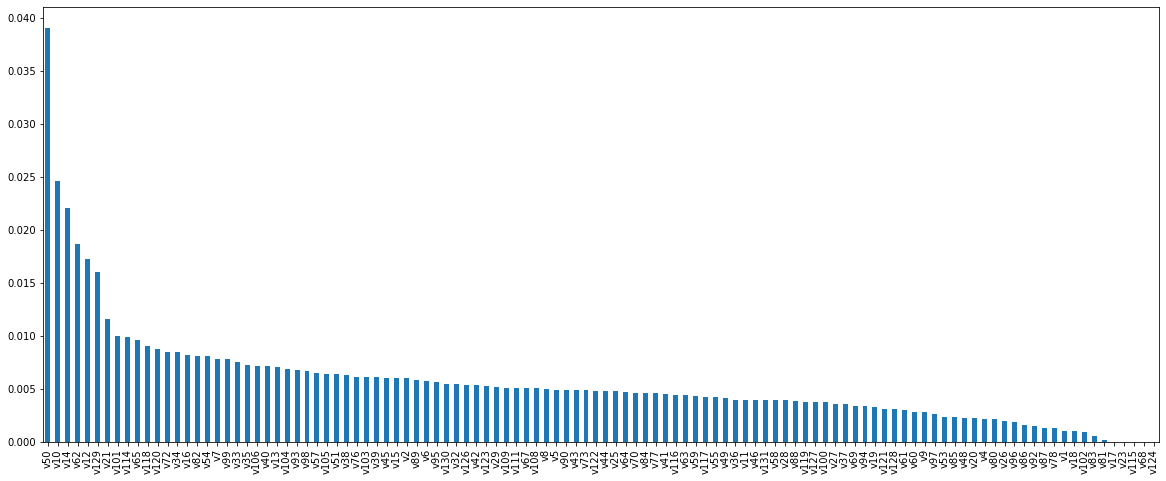

In [8]:
# and now let's plot the ordered MI values per feature
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Comparatively, we can see that there are a few features (left of the plot) that seem to contribute the most to predicting the target.There are also a few features with almost zero MI values on the right of the plot.

As I explained in the previous lecture, where to put the cut-off to select features is arbitrary. One could choose a certain value of MI after studying the plot above. An alternative and most frequent way of selecting features is to select the top 10, or top 20 features, or the features in the the top 10th percentile of the MI value distribution.

To do this, you can use mutual info in combination with SelectKBest or SelectPercentile from sklearn. SelectKBest allows you to determine how many features, and SelectPercentile the features within a certain percentile. See below.

In [9]:
# here I will select the top 10 features
# which are shown below
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['v10', 'v12', 'v14', 'v21', 'v34', 'v50', 'v51', 'v62', 'v114', 'v129'], dtype='object')

### Regression

In [10]:
# load dataset
data = pd.read_csv('houseprice.csv')
data.shape

(1460, 81)

In [11]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [12]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [13]:
# determine the mutual information
mi = mutual_info_regression(X_train.fillna(0), y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

OverallQual      0.536907
GrLivArea        0.480420
GarageCars       0.394648
TotalBsmtSF      0.381684
GarageArea       0.369995
YearBuilt        0.344567
1stFlrSF         0.311365
GarageYrBlt      0.270345
FullBath         0.261714
YearRemodAdd     0.247135
MSSubClass       0.246754
2ndFlrSF         0.239263
LotFrontage      0.217808
TotRmsAbvGrd     0.194010
Fireplaces       0.178118
OpenPorchSF      0.175315
LotArea          0.162676
BsmtFinSF1       0.162609
OverallCond      0.115811
BsmtUnfSF        0.109301
MasVnrArea       0.099729
HalfBath         0.084330
WoodDeckSF       0.071285
BedroomAbvGr     0.052665
KitchenAbvGr     0.029312
BsmtFullBath     0.013575
3SsnPorch        0.012263
EnclosedPorch    0.010863
PoolArea         0.010040
ScreenPorch      0.008681
YrSold           0.003711
MiscVal          0.000000
MoSold           0.000000
Id               0.000000
LowQualFinSF     0.000000
BsmtFinSF2       0.000000
BsmtHalfBath     0.000000
dtype: float64

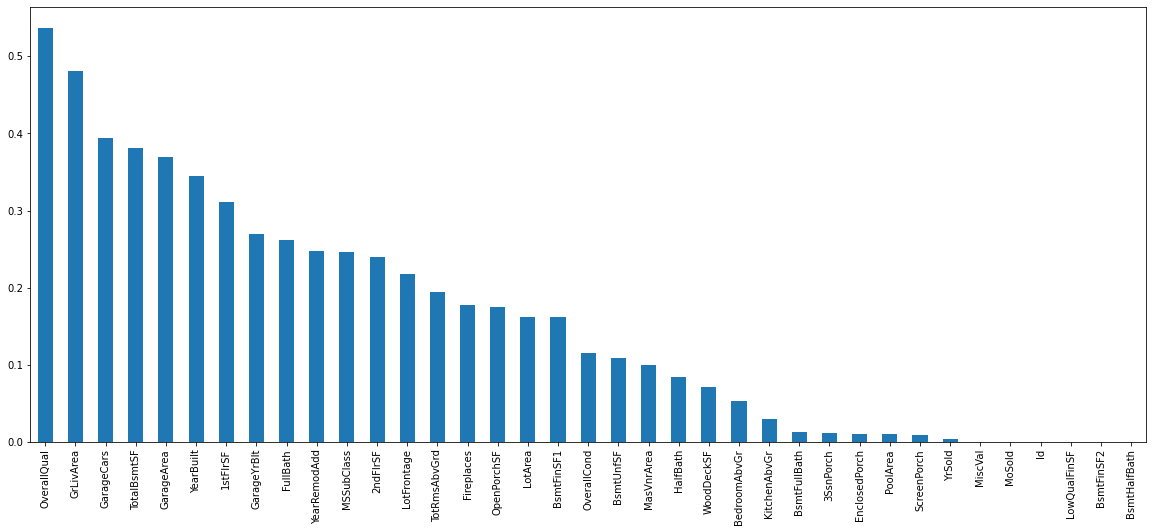

In [14]:
mi.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [15]:
# here I will select the top 10 percentile
sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars'], dtype='object')